<a href="https://colab.research.google.com/github/Batovs/MAP2110-2021-Modelagem-Matematica/blob/main/Projeto%204/Tomografia%20Computadorizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from skimage import io
from skimage import data
import matplotlib.pyplot as plt
import math
  

In [ ]:
def ProjecaoOrtogonal (a,b,x_star):
  #Função para achar o ponto ortogonal entre a reta ax = b e o ponto x*
  num = b - (np.dot(a.T,x_star))
  den = np.dot(a.T,a)

  xp = x_star + num/den*a

  return xp

In [ ]:
#Teste Função ProjecaoOrtogonal
a = np.array([[1],[1]])
b = np.array([[2]])
x_star = np.array([[1],[3]])

ProjecaoOrtogonal(a,b,x_star)

array([[0.],
       [2.]])

In [ ]:
def Algoritmo1 (a1,a2,a3,b1,b2,b3,x,n):
  resultado = []
  resultado.append(np.array(x))
  x0 = ProjecaoOrtogonal(a1,b1,x)

  for i in range (n):
    x1 = ProjecaoOrtogonal(a1,b1,x0)
    resultado.append(x1)
    x2 = ProjecaoOrtogonal(a2,b2,x1)
    resultado.append(x2)
    x3 = ProjecaoOrtogonal(a3,b3,x2)
    resultado.append(x3)
    x0 = x3
  
  return resultado


In [ ]:
#Teste Para o exemplo1 do Livro (pg. 621)
a1 = np.array([[1],[1]])
b1 = 2
a2 = np.array([[1],[-2]])
b2 = -2
a3 = np.array([[3],[-1]])
b3 = 3
x = np.array([[1],[3]])
n = 6 #rodadas de iteração
tab1 = Algoritmo1(a1,a2,a3,b1,b2,b3,x,n)
tab1

[array([[1],
        [3]]), array([[0.],
        [2.]]), array([[0.4],
        [1.2]]), array([[1.3],
        [0.9]]), array([[1.2],
        [0.8]]), array([[0.88],
        [1.44]]), array([[1.42],
        [1.26]]), array([[1.08],
        [0.92]]), array([[0.832],
        [1.416]]), array([[1.408],
        [1.224]]), array([[1.092],
        [0.908]]), array([[0.8368],
        [1.4184]]), array([[1.4092],
        [1.2276]]), array([[1.0908],
        [0.9092]]), array([[0.83632],
        [1.41816]]), array([[1.40908],
        [1.22724]]), array([[1.09092],
        [0.90908]]), array([[0.836368],
        [1.418184]]), array([[1.409092],
        [1.227276]])]

In [ ]:
Tabela1 = pd.DataFrame()

#Df apartir de tab1 (resultado do ex1)
for i in range (len(tab1)):
  Tabela1 = Tabela1.append(tab1[i].T.tolist())

#Renomeando Colunas e resetando o index
Tabela1.rename({0:'X1',1:'X2'},inplace=True,axis=1)
Tabela1 = Tabela1.reset_index().drop('index',axis=1)
Tabela1

,X1,X2
0,1.000000,3.000000
1,0.000000,2.000000
2,0.400000,1.200000
3,1.300000,0.900000
4,1.200000,0.800000
5,0.880000,1.440000
6,1.420000,1.260000
7,1.080000,0.920000
8,0.832000,1.416000
9,1.408000,1.224000


In [ ]:
def Algoritmo2 (a,b,xstar,n):
  
  resultado = []
  lenb = len(b)
  resultado.append(np.atleast_2d(xstar)) #primeiro resultado
  xstarC = np.atleast_2d(xstar).T #lista em vetor coluna
  x0 = ProjecaoOrtogonal(np.array(a[0].T),b[0],xstarC)

  for j in range(n):
    for i in range (lenb):
      x0 = ProjecaoOrtogonal(np.array(a[i].T),b[i],x0)
      resultado.append(x0.T)
   
  
  return resultado

In [ ]:
#Matriz vetor a para o método do centro do pixel
a =np.matrix([[0,0,0,0,0,0,1,1,1],
              [0,0,0,1,1,1,0,0,0],
              [1,1,1,0,0,0,0,0,0],
              [0,0,0,0,0,1,0,1,1],
              [0,0,1,0,1,0,1,0,0],
              [1,1,0,1,0,0,0,0,0],
              [0,0,1,0,0,1,0,0,1],
              [0,1,0,0,1,0,0,1,0],
              [1,0,0,1,0,0,1,0,0],
              [0,1,1,0,0,1,0,0,0],
              [1,0,0,0,1,0,0,0,1],
              [0,0,0,1,0,0,1,1,0]])
#Valores de b
b = [13.0, 15.0, 8.0, 14.79, 14.31, 3.81, 18.0, 12.0, 6.0, 10.51, 16.13, 7.04]
xstar = np.zeros(9)         

In [ ]:
Algoritmo2(a,b,xstar,1)#Primeira iteração até x1_12

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 4.33333333, 4.33333333, 4.33333333]]),
 array([[0.        , 0.        , 0.        , 5.        , 5.        ,
         5.        , 4.33333333, 4.33333333, 4.33333333]]),
 array([[2.66666667, 2.66666667, 2.66666667, 5.        , 5.        ,
         5.        , 4.33333333, 4.33333333, 4.33333333]]),
 array([[2.66666667, 2.66666667, 2.66666667, 5.        , 5.        ,
         5.37444444, 4.33333333, 4.70777778, 4.70777778]]),
 array([[2.66666667, 2.66666667, 3.43666667, 5.        , 5.77      ,
         5.37444444, 5.10333333, 4.70777778, 4.70777778]]),
 array([[0.49222222, 0.49222222, 3.43666667, 2.82555556, 5.77      ,
         5.37444444, 5.10333333, 4.70777778, 4.70777778]]),
 array([[0.49222222, 0.49222222, 4.93037037, 2.82555556, 5.77      ,
         6.86814815, 5.10333333, 4.70777778, 6.20148148]]),
 array([[0.49222222, 0.83555556, 4.93037037, 2.82

In [ ]:
tab2 = Algoritmo2(a,b,xstar,45)

Tabela2 = pd.DataFrame()

#Df apartir de tab1 (resultado do ex1)
for i in range (len(tab2)):
  Tabela2 = Tabela2.append(tab2[i].tolist())

#Renomeando Colunas e resetando o index
Tabela2.rename({0:'x1', 1:'x2', 2:'x3', 
                3:'x4', 4:'x5', 5:'x6',
                6:'x7', 7:'x8', 8:'x9'}, inplace=True,axis=1)
Tabela2 = Tabela2.reset_index().drop('index',axis=1)
Tabela2.round(2)


,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,4.33,4.33,4.33
2,0.00,0.00,0.00,5.00,5.00,5.00,4.33,4.33,4.33
3,2.67,2.67,2.67,5.00,5.00,5.00,4.33,4.33,4.33
4,2.67,2.67,2.67,5.00,5.00,5.37,4.33,4.71,4.71
...,...,...,...,...,...,...,...,...,...
536,1.23,0.85,5.58,2.06,7.75,4.85,1.67,3.40,7.58
537,1.58,0.85,5.58,2.41,7.75,4.85,2.02,3.40,7.58
538,1.58,0.60,5.32,2.41,7.75,4.59,2.02,3.40,7.58
539,1.32,0.60,5.32,2.41,7.49,4.59,2.02,3.40,7.32


In [ ]:
#Cria a matriz com os resultados, apartir da tabela
def MatrizResultado(tab_df):
  
  tab_df = pd.DataFrame(tab_df) #Para Funcionar com df ou array
  resultado = tab_df.tail(1)
  len_tab = len(resultado.iloc[0])
  n = int(math.sqrt(len_tab))
  saida = np.zeros((n,n))

  #Resultados em Matriz Quadrada n por n
  for i in range (n):
    for j in range (n):
      saida[i][j] = resultado.iloc[0][i*n + j]

  return saida

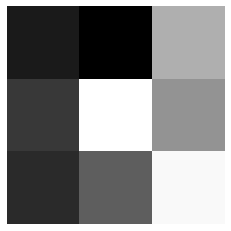

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(MatrizResultado(Tabela2), cmap='gray')
plt.axis('off')
plt.savefig('Imagem_ex4.png')


Diagonal //

In [ ]:
def cria_matriz_a_diagonal_1(n): # imagem n x n , com n*n pixels
  colunas = n*n
  linhas = (n-1)*2+1
  salto = n-1

  matriz = np.zeros((linhas, colunas))

  for i in range(int(linhas/2)+1):
    matriz[i][i] = 1
    for j in range(i):
      matriz[i][i+(j+1)*salto] = 1
  
  for i in range(int(linhas/2)+1, linhas):
    for j in range(colunas):
      matriz[i][j] = matriz[linhas-i-1][colunas-j-1]

  return matriz

In [ ]:
matriz_a_diagonal_1 = cria_matriz_a_diagonal_1(512)

In [ ]:
matriz_a_diagonal_1.shape

(1023, 262144)

Diagonal \\\

In [ ]:
def cria_matriz_a_diagonal_2(n): # imagem n x n , com n*n pixels
  colunas = n*n
  linhas = (n-1)*2+1
  salto = n+1

  matriz = np.zeros((linhas, colunas))

  for i in range(int(linhas/2)+1):
    matriz[i][n-1-i] = 1
    for j in range(i):
      matriz[i][n-1-i+(j+1)*salto] = 1
  
  for i in range(int(linhas/2)+1, linhas):
    for j in range(colunas):
      matriz[i][j] = matriz[linhas-i-1][colunas-j-1]

  return matriz

In [ ]:
matriz_a_diagonal_2 = cria_matriz_a_diagonal_2(512)

In [ ]:
matriz_a_diagonal_2.shape

(1023, 262144)

Vertical ||

In [ ]:
def cria_matriz_a_vertical(n): # imagem n x n , com n*n pixels
  linhas = n
  colunas = n*n
  salto = n

  matriz = np.zeros((linhas, colunas))

  for i in range(linhas):
    for j in range(linhas):
      matriz[i][i+salto*j] = 1
  
  return matriz

In [ ]:
matriz_a_vertical = cria_matriz_a_vertical(512)

In [ ]:
matriz_a_vertical.shape

(512, 262144)

Horizontal =

In [ ]:
def cria_matriz_a_horizontal(n): # imagem n x n , com n*n pixels
  linhas = n
  colunas = n*n
  salto = n

  matriz = np.zeros((linhas, colunas))

  for i in range(linhas):
    for j in range(linhas):
      matriz[i][salto*i+j] = 1
  
  return matriz

In [ ]:
matriz_a_horizontal = cria_matriz_a_horizontal(512)

In [ ]:
matriz_a_horizontal.shape

(512, 262144)

In [ ]:
def cria_matriz_a(n):
  md1 = cria_matriz_a_diagonal_1(n)
  md2 = cria_matriz_a_diagonal_2(n)
  mv = cria_matriz_a_vertical(n)
  mh = cria_matriz_a_horizontal(n)
  matriz_a = np.concatenate((md1,md2,mv,mh))
  return (np.asmatrix(matriz_a))

In [ ]:
matriz_512 = cria_matriz_a(512)

Deletar matrizes

In [ ]:
#del matriz_a_diagonal_1
#del matriz_a_diagonal_2
#del matriz_a_vertical
#del matriz_a_horizontal

##Teste Criação de Imagem

In [ ]:
#imagem 512 x 512
camera = data.camera()

plt.figure(figsize=(6, 6))
plt.imshow(camera, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
def CriaListab(matriz_a,imagem_np):
  len_img = len(imagem_np)
  pixel = len_img*len_img #n pixel para imagem quadrada
  vetor_pixel = [] #inicial
  for i in range (len_img):
    for j in range (len_img):
      vetor_pixel.append(imagem_np[i][j])
  vetor_pixel = np.array(vetor_pixel)

  b = []
  for k in range(len(matriz_a)):
    res = np.array(matriz_a[k])*vetor_pixel
    b.append(res.sum())

  return b

In [ ]:
teste = MatrizResultado(Tabela2)
CriaListab(a,teste)

In [ ]:
#Crop imagem camera em 80x80
camera80 = np.zeros((80,80))
for i in range(80):
  for j in range(80):
    camera80[i][j]= camera[300+i][300+j]

plt.figure(figsize=(6, 6))
plt.imshow(camera80, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
matriz_a_teste = cria_matriz_a(80)
b_teste = CriaListab(matriz_a_teste,camera80)
x_teste = np.zeros(6400)
teste80 = Algoritmo2(matriz_a_teste,b_teste,x_teste,200)

In [ ]:
teste80_df = pd.DataFrame(teste80[-1])
teste80img = MatrizResultado(teste80_df)
plt.figure(figsize=(6, 6))
plt.imshow(teste80img, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
MatrizA_512 = cria_matriz_a(512)

## Quesão 4 (reta central e área)

Reta Central

In [ ]:
#Matriz vetor a para o método da reta central
a_rc =np.matrix([[1,1,1,0,0,0,0,0,0],
                 [0,0,0,1,1,1,0,0,0],
                 [0,0,0,0,0,0,1,1,1],
                 [1,0,0,1,0,0,1,0,0],
                 [0,1,0,0,1,0,0,1,0],
                 [0,0,1,0,0,1,0,0,1],
                 [0.58578,0.82842,0,0.82842,0,0,0,0,0],
                 [0,0,1.41421,0,1.41421,0,1.41421,0,0],
                 [0,0,0,0,0,0.82842,0,0.82842,0.58578],
                 [0,0.82842,0.58578,0,0,0.82842,0,0,0],
                 [1.41421,0,0,0,1.41421,0,0,0,1.41421],
                 [0,0,0,0.82842,0,0,0.58578,0.82842,0]])
#Valores de b
b_rc = [8.0, 15.0, 13.0, 6.00, 12.00, 18.00, 3.81, 14.31, 14.79, 10.51, 16.13, 7.04]
xstar_rc = np.zeros(9)  

In [ ]:
tab3 = Algoritmo2(a_rc,b_rc,xstar_rc,45)

Tabela3 = pd.DataFrame()

#Df apartir de tab1 (resultado do ex1)
for i in range (len(tab3)):
  Tabela3 = Tabela3.append(tab3[i].tolist())

#Renomeando Colunas e resetando o index
Tabela3.rename({0:'x1', 1:'x2', 2:'x3', 
                3:'x4', 4:'x5', 5:'x6',
                6:'x7', 7:'x8', 8:'x9'}, inplace=True,axis=1)
Tabela3 = Tabela3.reset_index().drop('index',axis=1)
Tabela3.round(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2.67,2.67,2.67,0.00,0.00,0.00,0.00,0.00,0.00
2,2.67,2.67,2.67,5.00,5.00,5.00,0.00,0.00,0.00
3,2.67,2.67,2.67,5.00,5.00,5.00,4.33,4.33,4.33
4,0.67,2.67,2.67,3.00,5.00,5.00,2.33,4.33,4.33
...,...,...,...,...,...,...,...,...,...
536,2.17,1.44,3.96,1.62,4.37,8.70,1.79,5.88,5.18
537,2.17,1.44,3.96,1.62,4.37,8.55,1.79,5.72,5.07
538,2.17,1.40,3.93,1.62,4.37,8.50,1.79,5.72,5.07
539,2.10,1.40,3.93,1.62,4.30,8.50,1.79,5.72,5.00


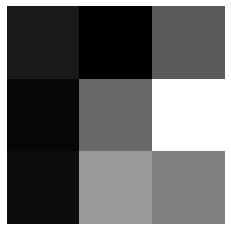

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(MatrizResultado(Tabela3), cmap='gray')
plt.axis('off')
plt.savefig('Imagem_ex4.png')

Área

In [ ]:
#Matriz vetor a para o método da Área
a_area =np.matrix([[1,1,1,0,0,0,0,0,0],
                 [0,0,0,1,1,1,0,0,0],
                 [0,0,0,0,0,0,1,1,1],
                 [1,0,0,1,0,0,1,0,0],
                 [0,1,0,0,1,0,0,1,0],
                 [0,0,1,0,0,1,0,0,1],
                 [0.61396,0.75,0.04289,0.75,0.04289,0,0.04289,0,0],
                 [0,0.25,0.91421,0.25,0.91421,0.25,0.91421,0.25,0],
                 [0,0,0.04289,0,0.04289,0.75,0.04289,0.75,0.61396],
                 [0.04289,0.75,0.61396,0,0.04289,0.75,0,0,0.04289],
                 [0.91421,0.25,0,0.25,0.91421,0.25,0,0.25,0.91421],
                 [0.04289,0,0,0.75,0.04289,0,0.61396,0.75,0.04289]])
#Valores de b
b_area = [8.0, 15.0, 13.0, 6.00, 12.00, 18.00, 3.81, 14.31, 14.79, 10.51, 16.13, 7.04]
xstar_area = np.zeros(9)  

In [ ]:
tab4 = Algoritmo2(a_area,b_area,xstar_area,45)

Tabela4 = pd.DataFrame()

#Df apartir de tab1 (resultado do ex1)
for i in range (len(tab4)):
  Tabela4 = Tabela4.append(tab4[i].tolist())

#Renomeando Colunas e resetando o index
Tabela4.rename({0:'x1', 1:'x2', 2:'x3', 
                3:'x4', 4:'x5', 5:'x6',
                6:'x7', 7:'x8', 8:'x9'}, inplace=True,axis=1)
Tabela4 = Tabela4.reset_index().drop('index',axis=1)
Tabela4.round(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
1,2.67,2.67,2.67,0.0,0.0,0.0,0.00,0.00,0.00
2,2.67,2.67,2.67,5.0,5.0,5.0,0.00,0.00,0.00
3,2.67,2.67,2.67,5.0,5.0,5.0,4.33,4.33,4.33
4,0.67,2.67,2.67,3.0,5.0,5.0,2.33,4.33,4.33
...,...,...,...,...,...,...,...,...,...
536,3.00,0.99,4.01,1.0,5.0,9.0,2.00,6.00,5.00
537,3.00,0.99,4.01,1.0,5.0,9.0,2.00,6.00,5.00
538,3.00,0.99,4.01,1.0,5.0,9.0,2.00,6.00,5.00
539,3.00,0.99,4.01,1.0,5.0,9.0,2.00,6.00,5.00


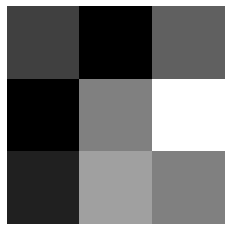

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(MatrizResultado(Tabela4), cmap='gray')
plt.axis('off')
plt.savefig('Imagem_ex4.png')

todas juntas

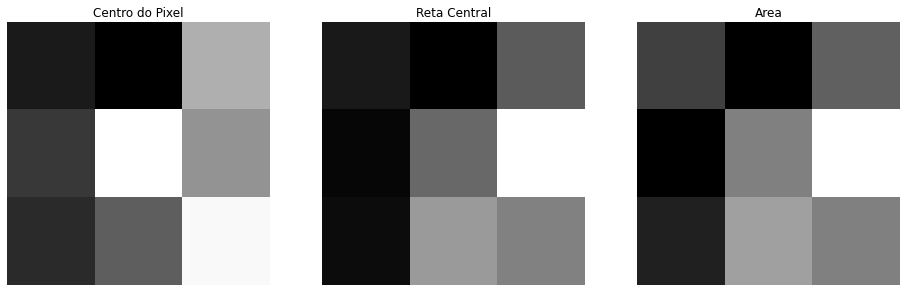

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6),
                               sharex=True, sharey=True)

ax0.imshow(MatrizResultado(Tabela2), cmap=plt.cm.gray)
ax0.axis('off')
ax0.set_title('Centro do Pixel')
ax1.imshow(MatrizResultado(Tabela3), cmap=plt.cm.gray)
ax1.set_title('Reta Central')
ax1.axis('off')
ax2.imshow(MatrizResultado(Tabela4), cmap=plt.cm.gray)
ax2.set_title('Area')
ax2.axis('off')

plt.show()